<h2>Q5:以參與者的每周學習時間以及特質焦慮量的相關性，探討學習時間是否影響焦慮的生成</h2>

In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.stats
import statsmodels.stats.weightstats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency
# read in our data
med_df = pd.read_csv("C:/Users/ASUS/Desktop/Data Carrard et al. 2022 MedTeach.csv")
med_df.head(5)

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


<h2>描述統計</h2>

In [2]:
#stud_h stai_t
category = med_df[["stud_h","stai_t"]].copy()
print(category.corr())

          stud_h    stai_t
stud_h  1.000000  0.152052
stai_t  0.152052  1.000000


<h3>
每周學習時間和焦慮量的相關係數為0.152052，
但仍然不能確定兩者是碰巧相關，還是真的相關
</h3>

In [3]:
print(med_df["stud_h"].describe())
print(med_df["stai_t"].describe())


count    886.000000
mean      25.288939
std       15.927875
min        0.000000
25%       12.000000
50%       25.000000
75%       36.000000
max       70.000000
Name: stud_h, dtype: float64
count    886.000000
mean      42.898420
std       11.978458
min       20.000000
25%       34.000000
50%       43.000000
75%       51.000000
max       77.000000
Name: stai_t, dtype: float64


|                |   mean   | std    |  min  | 25%     |  50%     | 75%  | max  |
|  ----          | ----     |  ----   | ---- | ----   |----     |----     |----   |
| Learning time  | 25.2889  | 15.9278 |0   |  12     |  25       |36     | 70  | 
| Anxiety amount |  42.8984 |11.9784 |  20  |34      |43         | 51      |77 |



[Text(0.5, 0, 'Studying time'),
 Text(0, 0.5, 'mean of Anxiety amount'),
 Text(0.5, 1.0, 'the Line Plot of Studying time vs mean of Anxiety amount')]

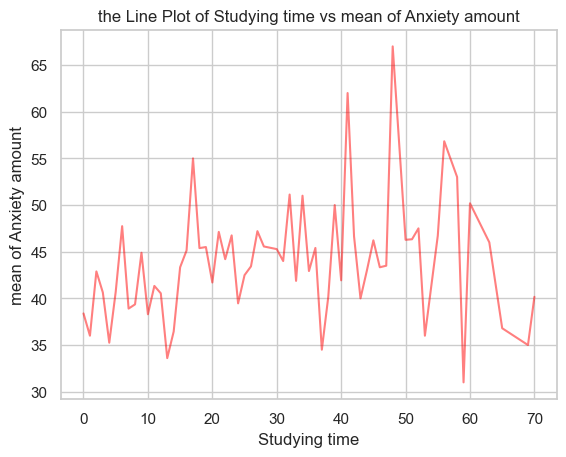

In [4]:
# stud_h stai_t
sb.set(style="whitegrid")
ax = sb.lineplot(data = med_df,x="stud_h", y= "stai_t", color='red',err_style=None,alpha=.5)
ax.set(xlabel="Studying time",ylabel="mean of Anxiety amount",title="the Line Plot of Studying time vs mean of Anxiety amount")


-----------------
<h2>檢定統計</h2>

<h3>
將每周學習時間<= 35hr 視為學習時間短，每周學習時間> 35hr 視為學習時間長

先檢定學習時間短vs焦慮量 和 學習時間長vs焦慮量 的資料是否為常態
</h3>



In [45]:
stud_h_stai_t_smaller35_df = med_df['stai_t'].loc[med_df['stud_h']<=35]
print(scipy.stats.normaltest(stud_h_stai_t_smaller35_df))
stud_h_stai_t_larger35_df = med_df['stai_t'].loc[med_df['stud_h']>35]
print(scipy.stats.normaltest(stud_h_stai_t_larger35_df))

NormaltestResult(statistic=14.552638452928875, pvalue=0.0006917269739853282)
NormaltestResult(statistic=4.631267386969373, pvalue=0.09870361634127528)


<h3>
因為兩者的p-value不全都 < 0.05，所以資料並不全是常態分布

因此使用無母數 Kruskal-Wallis H-test
</h3>
註: 無母數(non-parametric)分析資料不需為常態分布，也不需檢查資料是否為相同變異數

H0: 每周學習時間長短對焦慮量無顯著影響

H1: 每周學習時間長短對焦慮量有顯著影響



In [46]:
scipy.stats.kruskal (stud_h_stai_t_smaller35_df ,stud_h_stai_t_larger35_df)

KruskalResult(statistic=6.4363768676114415, pvalue=0.011180645893197377)

<h3>根據Kruskal-Wallis H-test的結果，

因為pvalue=0.011180645893197377 < 0.05，棄卻H0，

因此在顯著水準為0.05的情況下，每周學習時間的長短對焦慮量有顯著影響
</h3>

----------------------------------
<h2>延伸分析</h2>
<h3>
既然每周學習時間和焦慮量(心理上的)有關，那麼就好奇是否和生理健康有關呢

於是，我們把每周學習時間長短和生理健康也拿來作檢定

首先，一樣先檢查資料是否常態
</h3>

In [47]:
stud_h_health_smaller35_df = med_df['health'].loc[med_df['stud_h']<=35]
print(scipy.stats.normaltest(stud_h_health_smaller35_df))
stud_h_health_larger35_df = med_df['health'].loc[med_df['stud_h']>35]
print(scipy.stats.normaltest(stud_h_health_larger35_df))

NormaltestResult(statistic=82.12202003350761, pvalue=1.4703811562385643e-18)
NormaltestResult(statistic=16.3050574671641, pvalue=0.00028800614720853144)


<h3>
因為兩者的p-value < 0.05，所以資料不是常態分布
因此使用無母數 Kruskal-Wallis H-test
</h3>

H0: 每周學習時間長短對生理健康無顯著影響

H1: 每周學習時間長短對生理健康有顯著影響

In [48]:
scipy.stats.kruskal (stud_h_health_smaller35_df ,stud_h_health_larger35_df)

KruskalResult(statistic=4.1936490476709904, pvalue=0.04057567038344269)

<h3>根據Kruskal-Wallis H-test的結果，

因為pvalue=0.04057567038344269 < 0.05，棄卻H0，

因此在顯著水準為0.05的情況下，每周學習時間的長短對生理健康有顯著影響
</h3>

--------------
<h2>
結論
</h2>
<h3>
影響健康的層面很多種，而學習時間的長短對醫學生的焦慮量和生理健康都有顯著影響
</h3>
<h3>
Insight: 對於健康和學習表現之間，勢必要有取捨，或是規畫更有效率的學習方法，以降低達成學業目標所需的學習時間，才可以降低焦慮量的生成和對生理健康的損害。
</h3>